In [5]:
!pip install matplotlib

Epoch 1/5, Loss: 1.0286, Accuracy: 86.48%
Epoch 2/5, Loss: 0.3818, Accuracy: 90.45%
Epoch 3/5, Loss: 0.3232, Accuracy: 91.27%
Epoch 4/5, Loss: 0.2917, Accuracy: 91.95%
Epoch 5/5, Loss: 0.2677, Accuracy: 92.10%


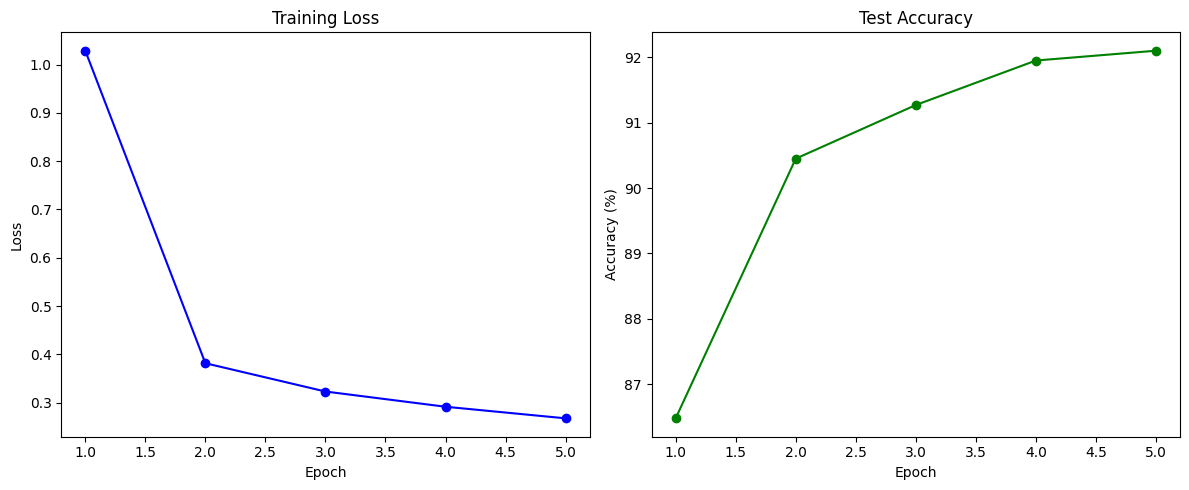

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Loading MNIST dataset with some changes
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# creating datasets for training and testing
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Creating data loader instances for batching and shuffling
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False)

# defining Neural Network model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.layer1 = nn.Linear(28*28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.output_layer = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten input
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

# Initialize the network, loss function, and optimizer
model = SimpleNet()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# listing to keep track of training loss and test accuracy
loss_history = []
accuracy_history = []

# Training the model
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        predictions = model(images)
        loss = loss_function(predictions, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * images.size(0)

    average_loss = total_loss / len(train_loader.dataset)
    loss_history.append(average_loss)

    # Evaluating the model
    model.eval()
    correct_predictions = 0
    total_samples = 0
    with torch.no_grad():
        for images, labels in test_loader:
            predictions = model(images)
            _, predicted_labels = torch.max(predictions.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted_labels == labels).sum().item()

    accuracy = 100 * correct_predictions / total_samples
    accuracy_history.append(accuracy)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%')

# plot the loss and accuracy over epochs
plt.figure(figsize=(12, 5))

# plot the Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), loss_history, marker='o', color='blue')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# plot the Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), accuracy_history, marker='o', color='green')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()
